# 1. Import the dataset and necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


# 2. Dataset Exploration: 

I. Number of rows and columns in the dataset:

In [4]:
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 1025
Number of columns: 14


II. Columns in the dataset are:

In [5]:
print(f"Columns in the datatset are: \n{df.columns}")

Columns in the datatset are: 
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


III. Statistical analysis of the dataset:

In [6]:
print(f"Statistical analysis of the dataset: \n{df.describe()}")

Statistical analysis of the dataset: 
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min     

IV. Number of patients with heart disease and without heart disesase:

In [7]:
normal, defect = df.groupby('target')['age'].count()
print(f"Total patients with no heart disease: {normal}")
print(f"Total patients with heart disease: {defect}")

Total patients with no heart disease: 499
Total patients with heart disease: 526


V. Visualization of the datatset:

D:\Anaconda\envs\tensorflowgpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Anaconda\envs\tensorflowgpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Anaconda\envs\tensorflowgpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='target', ylabel='count'>

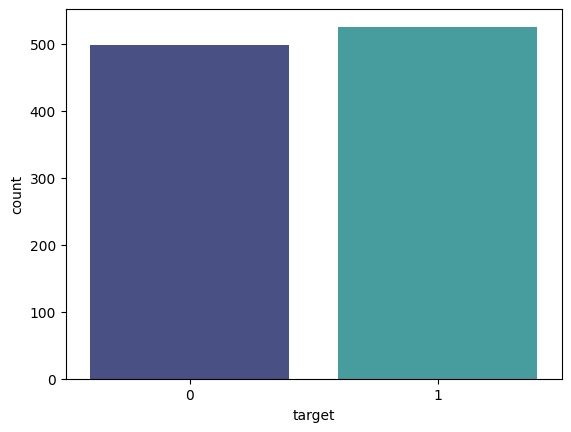

In [8]:
sns.countplot(x = 'target', palette = 'mako', data = df)

# 3. Data Cleaning and Processing:

I. Find missing values:

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

II. Find duplicate values:

In [10]:
index = df.duplicated(keep=False).count()
if index == rows:
    print("There are no duplicates in the dataset")

There are no duplicates in the dataset


# 4. Split the datatset into input and output/target columns:

In [11]:
x = df.iloc[:, 0:13].values
y = df.iloc[:, 13]

# 5. Preprocessing our train set:

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()
x = sc.fit_transform(x)

# 6. Split the datatset into train and test set:

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=30)

# 7. Value of K for KNearestNeighbor:

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

I. Square root method:

In [17]:
k = round(np.sqrt(len(x)))
print(f"Value of k: {k}")

Value of k: 32


II. Trial and hit method:

In [18]:
l = []
for i in range(3, 34):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    a = accuracy_score(y_test, y_pred)
    l.append(a)

In [19]:
for k, score in enumerate(l, 3):
    print(f"k value: {k},  Accuracy score: {score}")

k value: 3,  Accuracy score: 0.9707317073170731
k value: 4,  Accuracy score: 0.9170731707317074
k value: 5,  Accuracy score: 0.8878048780487805
k value: 6,  Accuracy score: 0.8926829268292683
k value: 7,  Accuracy score: 0.8731707317073171
k value: 8,  Accuracy score: 0.8731707317073171
k value: 9,  Accuracy score: 0.8878048780487805
k value: 10,  Accuracy score: 0.8926829268292683
k value: 11,  Accuracy score: 0.8926829268292683
k value: 12,  Accuracy score: 0.8878048780487805
k value: 13,  Accuracy score: 0.8829268292682927
k value: 14,  Accuracy score: 0.8829268292682927
k value: 15,  Accuracy score: 0.8878048780487805
k value: 16,  Accuracy score: 0.8731707317073171
k value: 17,  Accuracy score: 0.8682926829268293
k value: 18,  Accuracy score: 0.8682926829268293
k value: 19,  Accuracy score: 0.8731707317073171
k value: 20,  Accuracy score: 0.8829268292682927
k value: 21,  Accuracy score: 0.8731707317073171
k value: 22,  Accuracy score: 0.8634146341463415
k value: 23,  Accuracy scor

III. Visualization of k value and accuracy score:

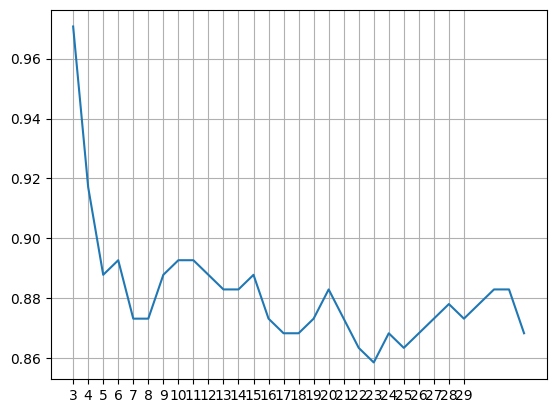

In [20]:
plt.plot(range(3,34), l)
plt.xticks(range(3,30))
plt.grid()
plt.show()

# 8. Train the model using KNearest Neighbour:

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
y_pred1 = knn.predict(x_test)

# 9. Model performance using Accuracy Score and Confusion Matrix:

I. Accuracy Score:

In [23]:
from sklearn.metrics import accuracy_score
print(f"Accuracy Score: {accuracy_score(y_test, y_pred1)}")

Accuracy Score: 0.9707317073170731


II. Confusion Matrix: 

<Axes: >

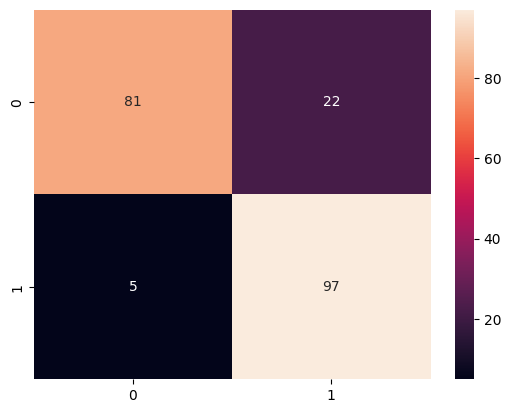

In [24]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

# 10. Testing the model:

In [25]:
print(f"test set: \n{x_test}")

test set: 
[[ 0.39324077 -1.51170646  1.02761788 ...  0.99543334 -0.73197147
  -0.52212231]
 [-1.48151173  0.66150409  0.05593123 ... -0.6241209  -0.73197147
  -2.1340963 ]
 [-0.15815703  0.66150409  1.02761788 ... -2.24367514 -0.73197147
  -0.52212231]
 ...
 [ 0.39324077  0.66150409  1.02761788 ...  0.99543334  1.20922066
   1.08985168]
 [ 0.28296121  0.66150409  1.02761788 ...  0.99543334 -0.73197147
  -0.52212231]
 [ 1.82687503 -1.51170646  0.05593123 ...  0.99543334  1.20922066
  -0.52212231]]


In [26]:
x_test[0]

array([ 0.39324077, -1.51170646,  1.02761788, -0.66321646,  1.8228593 ,
       -0.41887792,  0.89125488,  0.99527517, -0.71228712, -0.91232909,
        0.99543334, -0.73197147, -0.52212231])

In [27]:
print(f"target value: \n{y_test}")

target value: 
288    1
132    1
127    1
485    0
834    0
      ..
964    1
413    0
381    0
443    1
702    1
Name: target, Length: 205, dtype: int64


In [28]:
y_test.iloc[0]

1

I. Prediction

In [29]:
r = knn.predict(x_test[[0]])

In [30]:
r[0]

1

# 11. Export the model:

In [31]:
import pickle
pickle.dump(knn, open("HeartDiseaseDetectionModel.pkl", "wb"))